<a href="https://colab.research.google.com/github/DexterWilliamson/school_work/blob/master/DexterWilliamson_Making_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(8.2, -10.5, 'SOURCE: IMDB')

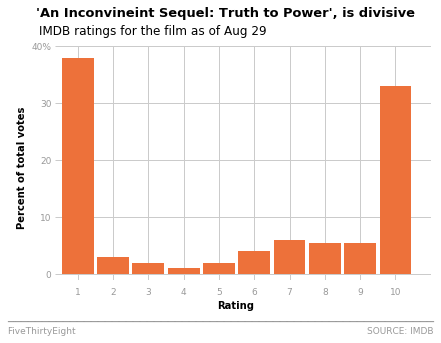

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5.5, 5.5, 33], 
                 index=range(1,11))

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()



fake.plot.bar(width=0.9, color='#ed713a');


ax.set_title("'An Inconvineint Sequel: Truth to Power', is divisive",
             loc='left', c='000000', fontsize='13', fontweight='bold',
             x=-0.05, y=1.1)

ax.text(s='IMDB ratings for the film as of Aug 29', x=-1.1, y=42,
        color='black', fontsize='12')

ax.set_xlabel('Rating', color='black', 
              fontweight='bold', fontsize=10, x=0.48)

ax.set_ylabel('Percent of total votes', color='black', 
              fontweight='bold', fontsize=10, y=0.48)


yticks=range(0,50,10)

ax.set_yticks(ticks=yticks)

fig.patch.set(facecolor='white')
ax.set(facecolor='white')

ax.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim([-1,40])
ax.set_xlim([-.65,10])

ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10], color='#999999',
                   rotation='horizontal', fontsize=9);

ax.set_yticklabels([0,10,20,30,'40%'], color='#999999',
                   rotation='horizontal', fontsize=9);

ax.text(s='_____________________________________________________________', color='#999999', x=-2, y=-8)
ax.text(s='FiveThirtyEight', color='#999999', fontsize=9, x=-2, y=-10.5)
ax.text(s='SOURCE: IMDB', color='#999999', fontsize=9, x=8.20, y=-10.5)
#closest I could get

In [0]:
#Take in data

data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')

#Get rid of unneeded data

data2 = data.iloc[15:]
data2 = data2.drop([16,16])
data2 = data2.drop(['n', 'alcohol-use', 'alcohol-frequency', 'age'], axis=1)

#Create list of undesirables and drop them

droplist = [i for i in data2.columns if i.endswith('frequency')]
data2.drop(droplist,axis=1,inplace=True)

#Transposed and tidied since the original format was hard to work with

data2 = data2.T
data2 = data2.reset_index()
data2 = data2.rename(columns=({
    'index' : 'Drug',
    15 : 'Usage'
}))

#Clean up a little bit

data2['Drug'] = data2['Drug'].str.replace(r'-use', '', regex=True)

data2['Drug'] = data2['Drug'].str.replace(r'-', ' ', regex=True)

data2['Drug'] = data2['Drug'].str.capitalize()

data2 = data2.sort_values(['Usage', 'Drug'], axis=0, ascending=False)

data2

,Drug,Usage
0,Marijuana,7.3
6,Pain releiver,2.5
8,Tranquilizer,1.4
1,Cocaine,0.9
7,Oxycontin,0.4
2,Crack,0.4
9,Stimulant,0.3
4,Hallucinogen,0.3
11,Sedative,0.2
10,Meth,0.2


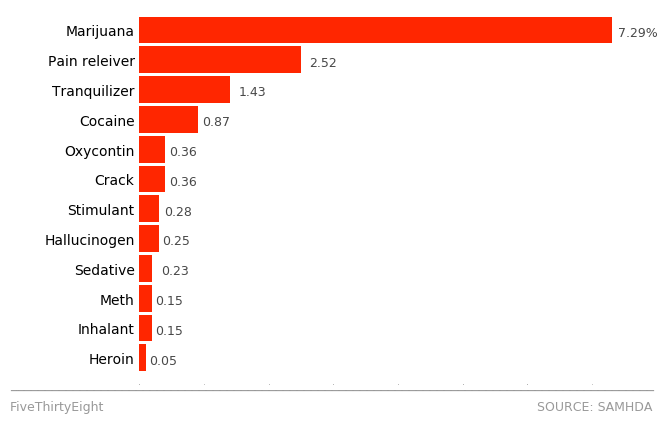

In [0]:
import numpy as np

#Set the style and reset to defualts

plt.style.use('fivethirtyeight')

plt.rcdefaults()

#Didn't want to do this but the data in the csv doesn't match the graph

usage = pd.Series([7.29, 2.52, 1.43, 0.87, 0.36, 0.36,
                   0.28, 0.25, 0.23, .15, .15, 0.05], index=range(1,13))

fig, ax = plt.subplots()

#Define the chart

data2['Usage'].plot.barh(width=0.9, color='#ff2600')

#Just getting the amount of ticks from the amount of.....drugs

num_drugs = np.arange(len(data2['Drug']))

ax.set_yticks(num_drugs)

#Put on the labels and flip it so it matches the picture

ax.set_yticklabels(data2['Drug'])

ax.invert_yaxis() 

fig.patch.set(facecolor='white')
ax.set(facecolor='white')

#Get rid of the spines

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Get rid of the ticks on both axis and remove the x axis label

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='x', labelsize=0)

#Place the numbers infront of the bar depending on it's x,y

for i, num in enumerate(usage):

    if num == 7.29:

      ax.text(num + .1, i + .20, '7.29%', color='#484848', fontsize=9)

    else:

      ax.text(num + .1, i + .20, str(num), color='#484848', fontsize=9)

ax.text(s='____________________________________________________________________________________________', color='#999999', x=-2, y=12)
ax.text(s='FiveThirtyEight', color='#999999', fontsize=9, x=-2, y=12.75)
ax.text(s='SOURCE: SAMHDA', color='#999999', fontsize=9, x=6.15, y=12.75)

plt.show()

In [0]:
country_data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')

In [0]:
data = country_data.filter(regex='side dish')

headers = pd.DataFrame({'Side_Dish' : ['Brussel_Sprouts', 'Carrots', 'Cauliflower', 'Corn',
                    'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac & Cheese',
                    'Mash_Potatoes', 'Rolls', 'Squash', 'Vegitable_Salad',
                    'Yams','Other1', 'Other2']})




#data = data.T
data = pd.concat([data, headers], axis=1)
data = pd.concat([data, country_data['US Region']], axis=1)

data = data.reset_index()

In [0]:
test = 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts'


In [0]:
data['total_food']

0       155
1       155
2       155
3       155
4       155
       ... 
1053    155
1054    155
1055    155
1056    155
1057    155
Name: total_food, Length: 1058, dtype: int64

In [0]:
data['Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots'].value_counts().sum()

242